In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


Implementación del método de montecarlo con:

$$ E = \frac{1}{N} \sum_{n=1}^N f(x_n) $$

con $x_n$ números aleatorios en el intervalo de integración $[ x_i , x_f]$

In [2]:
##==== Metodos 1-D

#--- Método de integración de Montecarlo teniendo en cuenta la normalización 
def Mc_E(f, N, xi, xf):
    
    x_val = np.random.uniform(xi, xf, N)
    y_val = f(x_val)
    
    E_cal = np.sum(y_val) / N
    
    return E_cal     

#Varianza de MonteCarlo
def Mc_S(f, E, xi, xf, N):
    
    x_val = np.random.uniform(xi, xf, N)
    y_val = f(x_val)
    
    suma = y_val**2 - E**2
    
    S = np.sum(suma) / N 
    
    return S    

Probaremos montecarlo con algunas funciones

In [3]:
def x3(x): return 1/(x**3)
def x2(x): return 1/(x**0.5)

Compararemos con la librería de integración de scipy.integrate.quad para diferentes números de puntos

In [26]:
##---- Para funciones 1-D
x_i = 1.0; x_f = 10.0

N_p = [100, 1000, 10000]

I_3 = integrate.quad(x3, x_i, x_f)
I_2 = integrate.quad(x2, x_i, x_f)
E_3 = []; S_3=[]
E_2 = []; S_2=[]
for n in N_p:
    e_3 = Mc_E(x3, n, x_i, x_f) 
    s_3 = Mc_S(x3, e_3, x_i, x_f, n)
    E_3.append((x_f-x_i)*e_3); S_3.append((x_f-x_i)*s_3)
    
    e_2 = Mc_E(x2, n, x_i, x_f)
    s_2 = Mc_S(x2, e_2, x_i, x_f, n)
    E_2.append((x_f-x_i)*e_2); S_2.append((x_f-x_i)*s_2)

Text(0, 0.5, 'E difference')

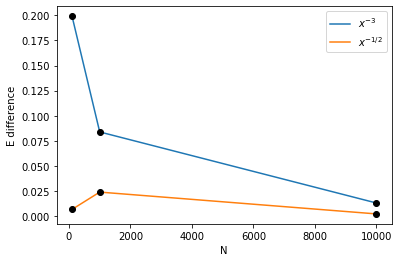

In [27]:
#--- Graficando diferencia entre integrate y Montecarlo

diff1 = np.abs(I_3[0] - np.array(E_3)); diff2 = np.abs(I_2[0] - np.array(E_2))

plt.plot(N_p, diff1, label=r'$x^{-3}$'); plt.plot(N_p, diff1, 'ko')
plt.plot(N_p, diff2, label=r'$x^{-1/2}$'); plt.plot(N_p, diff2, 'ko')

plt.legend()
plt.xlabel("N"); plt.ylabel("E difference")

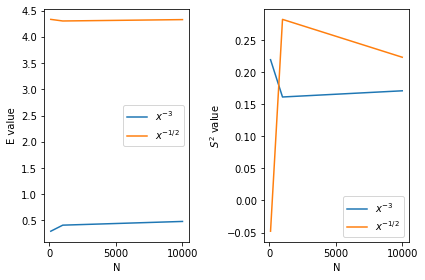

In [28]:
#--- Graficas 1-D
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(N_p, E_3, label=r'$x^{-3}$'); ax1.plot(N_p, E_2, label=r'$x^{-1/2}$')
ax2.plot(N_p, S_3, label=r'$x^{-3}$'); ax2.plot(N_p, S_2, label=r'$x^{-1/2}$')

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("E value"); ax2.set_ylabel(r'$S^2$ value')
ax1.legend(); ax2.legend()

plt.tight_layout()

In [29]:
#===== Metodos 3-D

def x3d(x, y, z): 
    return 1/x + y + z**2

def Mc_3E(f, N, xi, xf):
    
    x1_val = np.random.uniform(xi[0], xf[0], N)
    x2_val = np.random.uniform(xi[1], xf[1], N)
    x3_val = np.random.uniform(xi[2], xf[2], N)
    
    y_val = f(x1_val, x2_val, x3_val)
    
    E_cal = np.sum(y_val) / N
    
    return E_cal     

def Mc_3S(f, E, xi, xf, N):
    
    x1_val = np.random.uniform(xi[0], xf[0], N)
    x2_val = np.random.uniform(xi[1], xf[1], N)
    x3_val = np.random.uniform(xi[2], xf[2], N)
    
    y_val = f(x1_val, x2_val, x3_val)
    
    suma = y_val**2 - E**2
    
    S = np.sum(suma) / N 
    
    return (xf[0]-xi[0])*(xf[1]-xi[1])*(xf[2]-xi[2])*S 

In [30]:
x3_i = [1, 0, 0]; x3_f = [10, 2, 2]

N_p = [100, 1000, 10000]

E_3d = []; S_3d = []

for n in N_p:
    e3d = Mc_3E(x3d, n, x3_i, x3_f)
    s3d = Mc_3S(x3d, e3d, x3_i, x3_f, n)

    S_3d.append(s3d)
    e3d = (x3_f[0]-x3_i[0])*(x3_f[1]-x3_i[1])*(x3_f[2]-x3_i[2])*e3d
    E_3d.append(e3d)

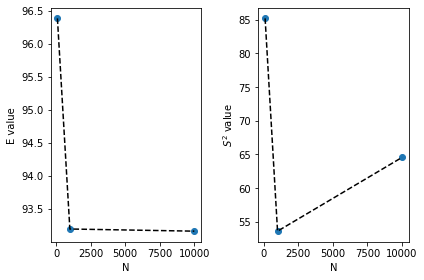

In [31]:
#--- Graficas 3D

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(N_p, E_3d, 'o'); ax2.plot(N_p, S_3d, 'o')
ax1.plot(N_p, E_3d, 'k--'); ax2.plot(N_p, S_3d, 'k--')

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("E value"); ax2.set_ylabel(r'$S^2$ value')

plt.tight_layout()

## Métodos para disminuir $S^2$

Implementaremos el muestreo estratificado dado por:

$$ E = \sum_{j=1}^{k} \frac{vol(M_j)}{N_j} \sum_{m=1}^{N_j} f(x_{jm}) $$

Para ello, tomaremos el código 1-D ya desarrollado y lo haremos por sub intervalos del intervalo dado para el cálculo.

In [32]:
x_i = 1.0; x_f = 10.0

N_p = [100, 1000, 10000]
sp = 20

E_3 = []; S_3=[]
E_2 = []; S_2=[]
for i in N_p:
    sumE3 = 0; sumE2 = 0
    sumS3 = 0; sumS2 = 0
    
    x = np.linspace(x_i, x_f, i)
    xj = np.split(x, sp) #genero sp sub intervalos
    
    for xx in xj:
        n = len(xx)
        xin = xx[0]; xfn = xx[-1]
        
        e_3 = Mc_E(x3, n, xin, xfn) 
        s_3 = Mc_S(x3, e_3, xin, xfn, n)
        
        sumE3 += (xfn-xin)*e_3; sumS3 += (xfn-xin)*s_3
    
        e_2 = Mc_E(x2, n, xin, xfn)
        s_2 = Mc_S(x2, e_2, xin, xfn, n)
        
        sumE2 += (xfn-xin)*e_2; sumS2 += (xfn-xin)*s_2
    
    E_3.append(sumE3); S_3.append(sumS3)
    E_2.append(sumE2); S_2.append(sumS2)

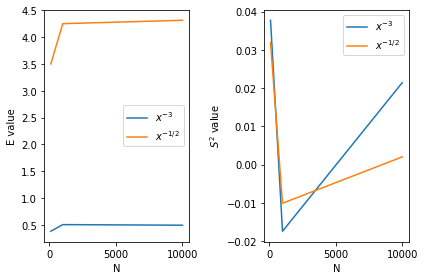

In [33]:
#--- Graficas 1-D con muestreo estratificado
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(N_p, E_3, label=r'$x^{-3}$'); ax1.plot(N_p, E_2, label=r'$x^{-1/2}$')
ax2.plot(N_p, S_3, label=r'$x^{-3}$'); ax2.plot(N_p, S_2, label=r'$x^{-1/2}$')

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("E value"); ax2.set_ylabel(r'$S^2$ value')
ax1.legend(); ax2.legend()

plt.tight_layout()

## Algoritmo Metropolis

Implementaremos el algoritmo de metropolis para el ejemplo de Rutherford que sigue la distribución:

$$ p(\theta) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-(\theta - \mu)^2}{2 \sigma^2}} $$

con $\mu = 0 $ y $\sigma=0.1 $

> Generaremos 1000 eventos y graficaremos $\theta$ que va entre $-\pi$ y $\pi$

In [22]:
def P_R(x):
    mu=0
    sig=0.1
    
    p = 1/(sig*2*np.sqrt(np.pi)) * np.exp(-(x-mu)**2 /(2*sig**2))
    
    return p

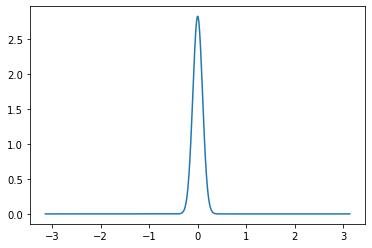

In [23]:
##--- Verificando que la funcion este bien hecha
x_p = np.arange(-np.pi, np.pi, 0.01)
y_p = P_R(x_p)

plt.plot(x_p, y_p)

In [24]:
phi0 = 2*np.pi*random.random() - np.pi

PHI = []
for k in range(0, 10000):
    phip = 2*np.pi*random.random() - np.pi

    ds = -np.log(P_R(phip)/P_R(phi0))

    if ds<0:
        phi0=phip
        PHI.append(phi0)
    elif ds>0:
        comp = random.random()
        pr = P_R(phip)/P_R(phi0)
        if pr>comp:
            phi0=phip
            PHI.append(phi0)
        elif pr<comp:
            #print(False)
            continue

#print(PHI)

(-3, 3)

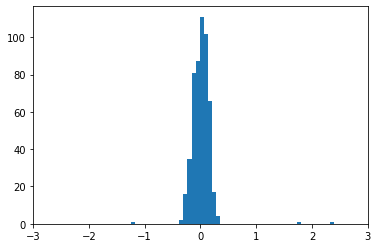

In [25]:
plt.hist(PHI, bins=50)
plt.xlim(-3, 3)